In [227]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Questions I'd like to answer:

* How much data do we have
* What is the data about (Fields, text subjects)
* Identify outliers
* Is the data complete? (Or there is missing data that we'd need to recover)

## 2. Opening the CSV file
(file was provided for this assignment)

### Questions I'd like to answer about the data:
1. What are the submissions with the highest submission_score(upvote)
2. What are the submissions with the highest number of comments
3. Average number of comments per submission

In [104]:
data = pd.read_csv("2019_may2021_historical_detailed.csv")

In [105]:
data.head(5)

,submission_id,submission_score,submission_title,submission_link_flair_text,submission_selftext,reply_author,reply_body,reply_created_utc
0,aglcrj,1,Goodnotes 4 vs. Goodnotes 5 right now,NaN,I have used Goodnotes 4 for work a ton. And I...,Mauri97,I'm getting a ton of bugs with 5 as well (snap...,1547656134
1,aglcrj,1,Goodnotes 4 vs. Goodnotes 5 right now,NaN,I have used Goodnotes 4 for work a ton. And I...,nathanwj,Goodnotes 5 is not yet compatible with the des...,1547658625
2,aglcrj,1,Goodnotes 4 vs. Goodnotes 5 right now,NaN,I have used Goodnotes 4 for work a ton. And I...,Rowyfo,I haven't downloaded GN5 yet but watched a wal...,1547662874
3,aglcrj,1,Goodnotes 4 vs. Goodnotes 5 right now,NaN,I have used Goodnotes 4 for work a ton. And I...,Mauri97,"That sounds a lot like what's going on, thanks!",1547663080
4,aglcrj,1,Goodnotes 4 vs. Goodnotes 5 right now,NaN,I have used Goodnotes 4 for work a ton. And I...,nongaussian,I will probably stick to GoodNotes 4 for a whi...,1547675267


In [269]:
data.sort_values(by=['submission_score'], ascending = False)

,submission_id,submission_score,submission_title,submission_link_flair_text,submission_selftext,reply_author,reply_body,reply_created_utc,word_count
5381,lqzsfd,132,Some doodles I drew during (and outside!) of class today,NaN,NaN,mochi-muncher,I just used the highlighter tool to color it in.,1614144685,39
5382,lqzsfd,132,Some doodles I drew during (and outside!) of class today,NaN,NaN,Stupid-Mathematician,Wow this is amazing!,1614149168,17
5384,lqzsfd,132,Some doodles I drew during (and outside!) of class today,NaN,NaN,tigerooni,Niceeeee,1614175292,8
5379,lqzsfd,132,Some doodles I drew during (and outside!) of class today,NaN,NaN,LT_derp12,these look so good!,1614141548,16
5380,lqzsfd,132,Some doodles I drew during (and outside!) of class today,NaN,NaN,Prasoon_29,These are great. \nHow do you fill colour?,1614143553,33
...,...,...,...,...,...,...,...,...,...
1331,g1qel9,0,Goodnotes is working on an improvement.,NaN,Got an email from the Goodnotes developer who says he understands the frustration in writing on ...,I_W_M_Y,All roads lead to Putin.,1622869165,20
1330,g1qel9,0,Goodnotes is working on an improvement.,NaN,Got an email from the Goodnotes developer who says he understands the frustration in writing on ...,HarderSpongebob,gearvr lens mod??,1622869165,15
1329,g1qel9,0,Goodnotes is working on an improvement.,NaN,Got an email from the Goodnotes developer who says he understands the frustration in writing on ...,ThickNerd69,Could always try 😉,1622869165,15
1328,g1qel9,0,Goodnotes is working on an improvement.,NaN,Got an email from the Goodnotes developer who says he understands the frustration in writing on ...,Littlepaddedprince,OMG Right!!! they are soooooooo adorable! On the topic of adorable! I really love your elegant d...,1622869165,125


In [264]:
data['submission_score'].unique()

array([  1,   3,   8,   2,   5,   0,   7,   4,   6,  25,  12,  45,  17,
         9,  11,  64,  29,  47,  38,  22,  10,  42,  48, 132,  24,  30,
        84,  16])

In [106]:
print("Total number of submissions:" ,len(data))
print("Unique submissions:",len(data['submission_id'].unique()))

Total number of submissions: 6618
Unique submissions: 639


In [107]:
# Removing duplicates:
data = data.drop_duplicates()
print("Total number of submissions (After removing dups):" ,len(data))

Total number of submissions (After removing dups): 6542


In [108]:
# Printing the same reply comments, to identify irrelevant messages
data[['reply_body']].groupby(['reply_body']).size().reset_index(name='Count').sort_values(by='Count', ascending=False)

,reply_body,Count
5313,[removed],118
5308,[deleted],101
3883,Thank you!,26
783,"Done, please upvote my Pinned Post! Oh please!...",12
3931,Thanks,10
...,...,...
2019,"I used the app ""Over"" last time I made them la...",1
2018,"I used both, right now mostly good notes. Here...",1
2017,I used a free font I downloaded called “Everyt...,1
2016,"I used Keynote, and just change the size of th...",1


In [115]:
# Removing irrelevant messages:
irrelevant_messages = ['[removed]','[deleted]']

data = data[data['reply_body'].apply(lambda x: x.strip() not in irrelevant_messages )]

In [116]:
print("Total number of submissions (After removing irrelevants):" ,len(data))

Total number of submissions (After removing irrelevants): 6323


## 3. Simple Statistics 

In [125]:
print("Average words in a reply: ",data['reply_body'].apply(lambda x: len(' '.join(x).split())).mean())

Average words in a reply:  135.02862565238019


In [143]:
print("Average replies per submission:", \
      data[['submission_id']] \
          .groupby(['submission_id']).size().reset_index(name='count') \
          ['count'].mean())

Average replies per submission: 9.895148669796557


In [148]:
print("Average upvotes per submission:", \
data[['submission_id','submission_score']] \
    .groupby(['submission_id','submission_score']).size().reset_index(name='count') \
    ['submission_score'].mean())


Average upvotes per submission: 2.395931142410016


## 4. The Most Popular Threads

Ho do we define popular?
First two things that poped to my mind were:  
* number of replies per thread
* upvote

But perhaps number of reply per thread is a better indicator, since it reflects how many people engaged with the thread (Positively, Negatively or Neutrally), wereas upvote only shows how many people found it useful. 


In [275]:
data[['submission_id','submission_title']].groupby(['submission_id','submission_title'])

In [278]:
# Most Popular Threads by count of replies:
data[['submission_id','submission_title']] \
    .groupby(['submission_id','submission_title']).size().reset_index(name='reply_count') \
    .sort_values(by=['reply_count'], ascending=False).head(10)[['submission_title','reply_count']]

,submission_title,reply_count
477,GoodNotes is the best thing ever🥰🥰🥰,42
603,thinking about getting an ipad...,41
253,"If I posted free digital stickers, would you use them?",38
430,I tried out procreate and made 25 fun notebook covers for you all (link in comments),37
456,Since I used GoodNotes my notes gets better every day. Might take time but totally worth it. Let...,35
359,okay yeah maybeeee i’ll start using dark paper,33
436,Free 2021 Hyperlink Digital Planner + Stickers ✨| GoodNotes 5 📖 | Digital Planning Made Easy |,31
406,2021 digital planner with hyperlinks,30
532,"Why isn’t GoodNotes indexing anything on this file? The ‘text’ isn’t selectable, but GN used to ...",29
3,What happened to the pen (Goodnotes 5)?,28


In [172]:
# Looking at the most popular submission:
pd.set_option('display.max_colwidth', 100)

most_popular_thread = data[data['submission_id']=='l8kvd1'].sort_values(by=['reply_created_utc'], ascending=True)

print("Title:",list(data[data['submission_id']=='l8kvd1']['submission_title'])[0])
print("Replies:")
most_popular_thread['reply_body']

Title: GoodNotes is the best thing ever🥰🥰🥰
Replies:


4750                                                                            Do you do IB by any chance?
4752                                                                                                  yes!!
4753                            Oml, gl. I graduated last year and I couldn't be happier leaving it behind.
4754    hahah thanks, wishing the may exam to happen cause otherwise with mock and ias to weigh more im ...
4755                                                  Is this your actual handwriting or some kind of font?
4756                                         Wow did you use a font or did you actually write this by hand?
4759                                                                            no heheh its my handwriting
4761                                                                                   its my handwriting☺️
4762                                                              i love the little drawings on the bottom!
4763    from these responses

What are people discussing in the most popular thread:
* GoodNotes software
* IB Curriculum
* Person's handwriting
* Drawings in GoodNotes
* Fonts in GoodNotes
* Joint Models

## 5. Top words mentioned in the reply:

In [190]:
import nltk
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

In [249]:
def ngramExtraction(texts, ngram_range=(1,1)):
    cv = CountVectorizer(ngram_range=ngram_range)
    X = cv.fit_transform(texts)
    word_list = cv.get_feature_names_out()
    count_list = np.asarray(X.sum(axis=0))[0]
    return pd.DataFrame({'ngram':word_list, 'count':count_list }).sort_values(by=['count'], ascending=False)

def visualizeNgrams(texts, n=1, limit=15):
    ngrams = ngramExtraction(texts,ngram_range=(n,n))
    plt.figure(figsize=(15,7))
    plt.title("Top %d ngrams (n=%d)"%(limit,n))
    ax=sns.barplot(x="ngram", y="count", data=ngrams[0:limit])
    plt.plot()

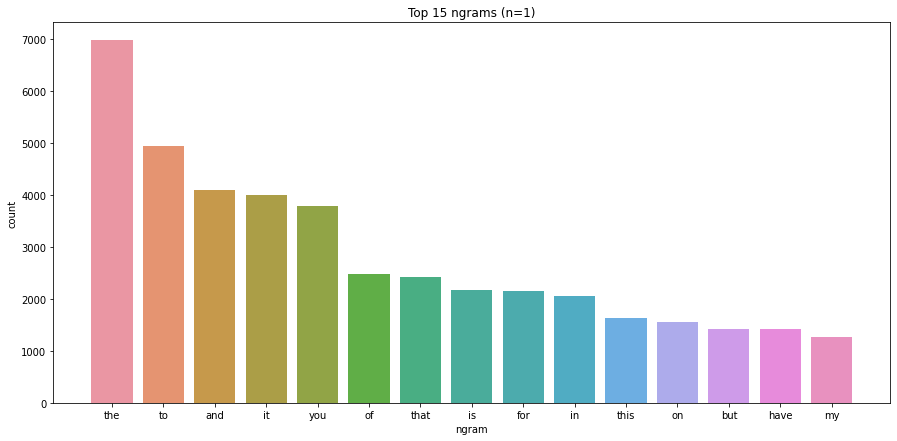

In [252]:
visualizeNgrams(data['reply_body'], n=1)

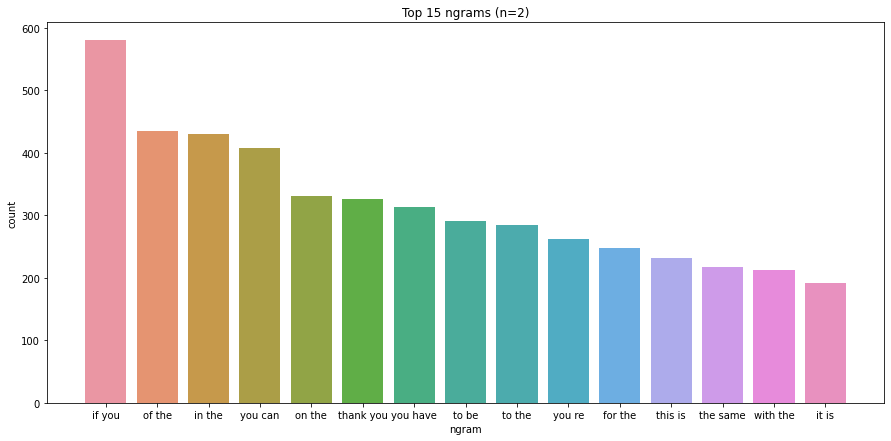

In [253]:
visualizeNgrams(data['reply_body'], n=2)

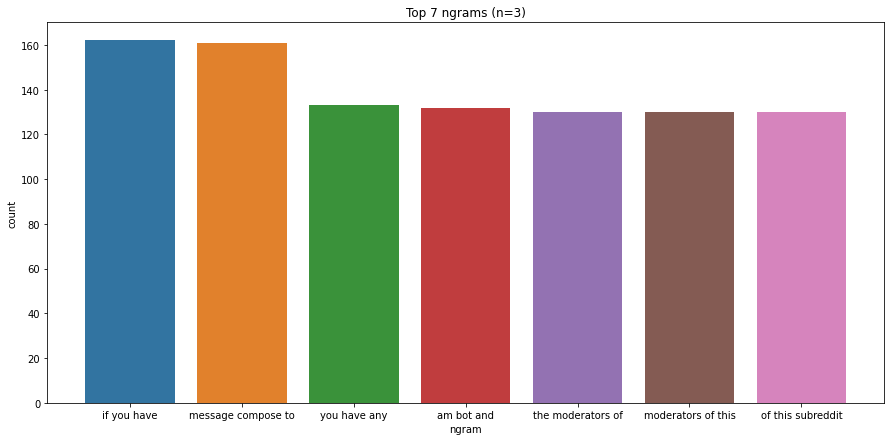

In [257]:
visualizeNgrams(data['reply_body'], n=3, limit=7)

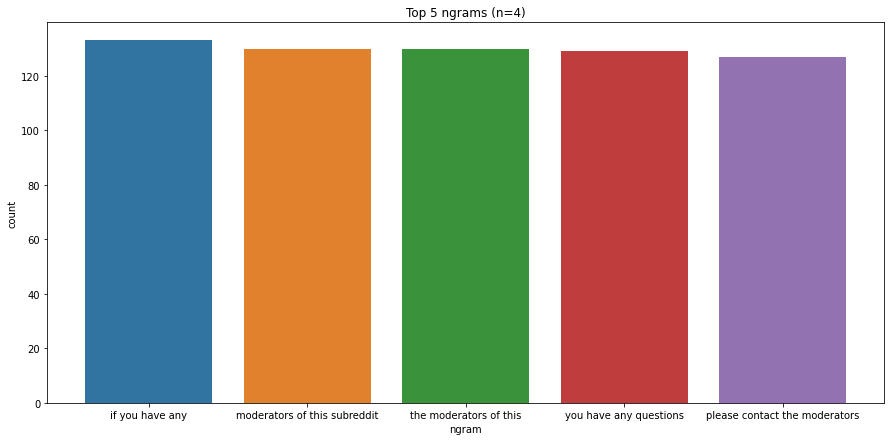

In [259]:
visualizeNgrams(data['reply_body'], n=4, limit=5)

#### Observations:
* Top words don't seem to reveal real meaning of replies since all 15 top words are stopwords, so we definitelly need to exclude stop words to get more meaning
* N grams of n=4 reveal that a number of posts include standard disclaimer to contact the moderators for questions



In [261]:
data.to_csv("initial_eda.csv", index=False)